# EcoFOCIpy ADCP QC - 19BSP-11A

- mostly remove >100 cm/s flows in u/v


In [48]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [49]:
xdf = xa.load_dataset('19bsp11a_velein_0116m.nc')

In [50]:
xdf =xdf.where(xdf.u_curr_comp <=250,np.nan)
xdf

xdf =xdf.where(xdf.v_curr_comp <=250,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 7146, depth: 26)
Coordinates:
  * time             (time) datetime64[ns] 2019-07-25T01:00:00 ... 2020-09-05...
  * depth            (depth) float64 6.0 10.0 14.0 18.0 ... 98.0 102.0 106.0
  * latitude         (latitude) float64 61.37
  * longitude        (longitude) float64 -177.2
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 4.317 ... -0....
    v_curr_comp      (latitude, longitude, time, depth) float64 -1.47 ... 5.258
    w_curr_comp      (latitude, longitude, time, depth) float64 4.0 2.6 ... -0.3
    w_curr_comp_err  (latitude, longitude, time, depth) float64 5.6 ... -0.5
    agc1             (latitude, longitude, time, depth) float64 63.0 ... 141.0
    agc2             (latitude, longitude, time, depth) float64 66.0 ... 152.0
    agc3             (latitude, longitude, time, depth) float64 63.0 ... 153.0
    agc4             (latitude, longitude, time, depth) float64 61.0 ... 144.0
Attributes: (12/13)
    Latitude_DegMMddW:                      61 22.357 N
    Longitude_DegMMddN:                     177 10.194 W
    MooringID:                              19BSP-11A
    platform_deployment_date:               2019-07-25T01:15:00Z
    platform_deployment_cruise_name:        
    platform_recovery_date:                 2020-09-06T04:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  Deployed Location assumed same as...
    WaterDepth:                             120.0
    date_created:                           2022-12-14T10:24:02Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                removed U,V >100cm/s  trimmed abo...

In [51]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

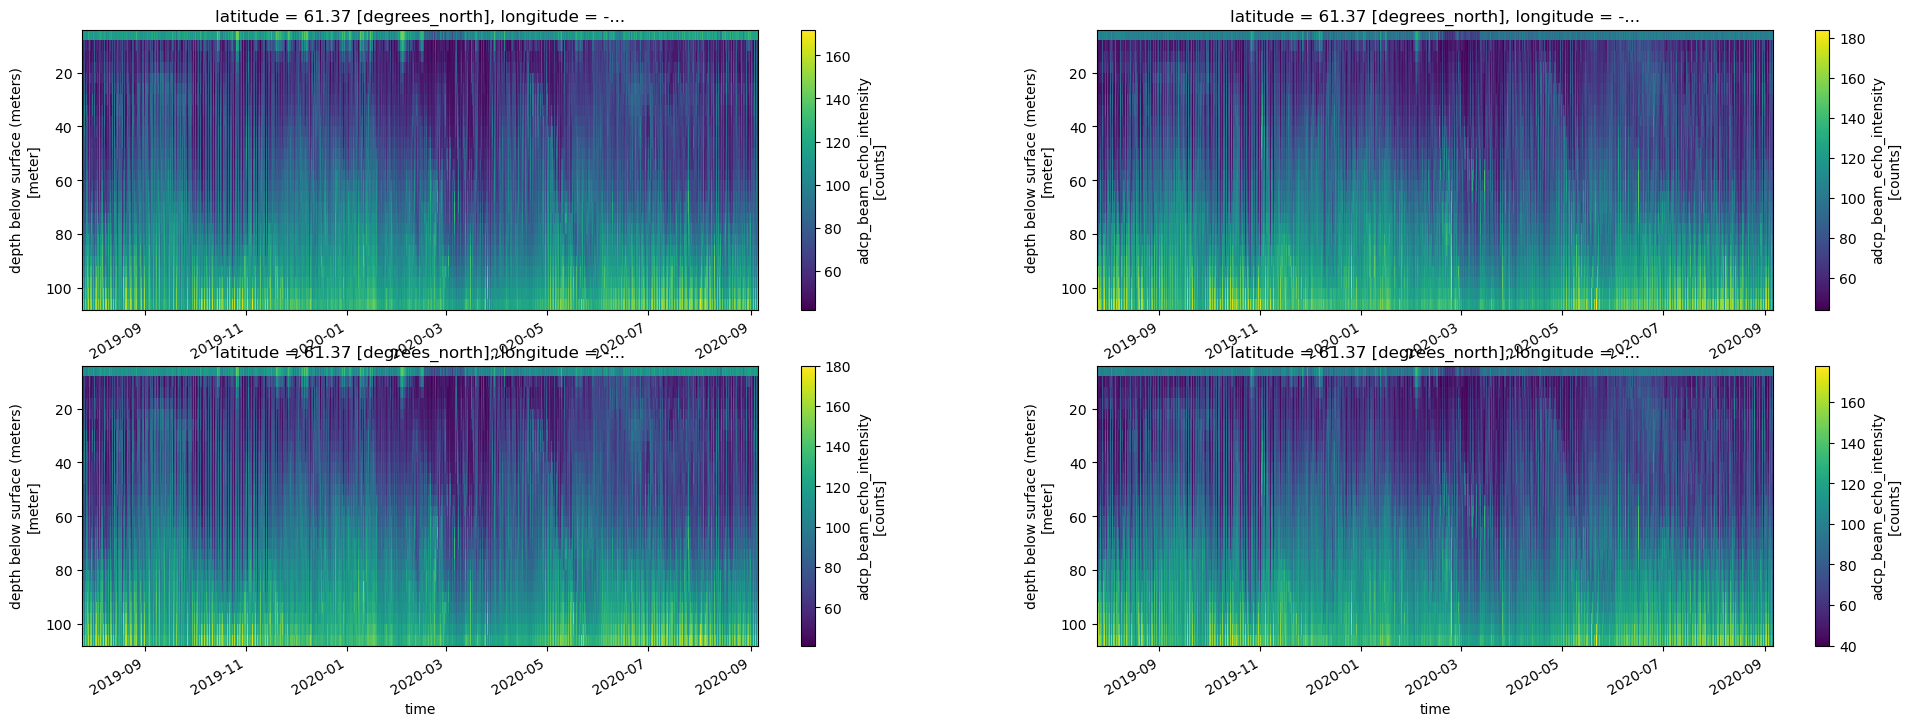

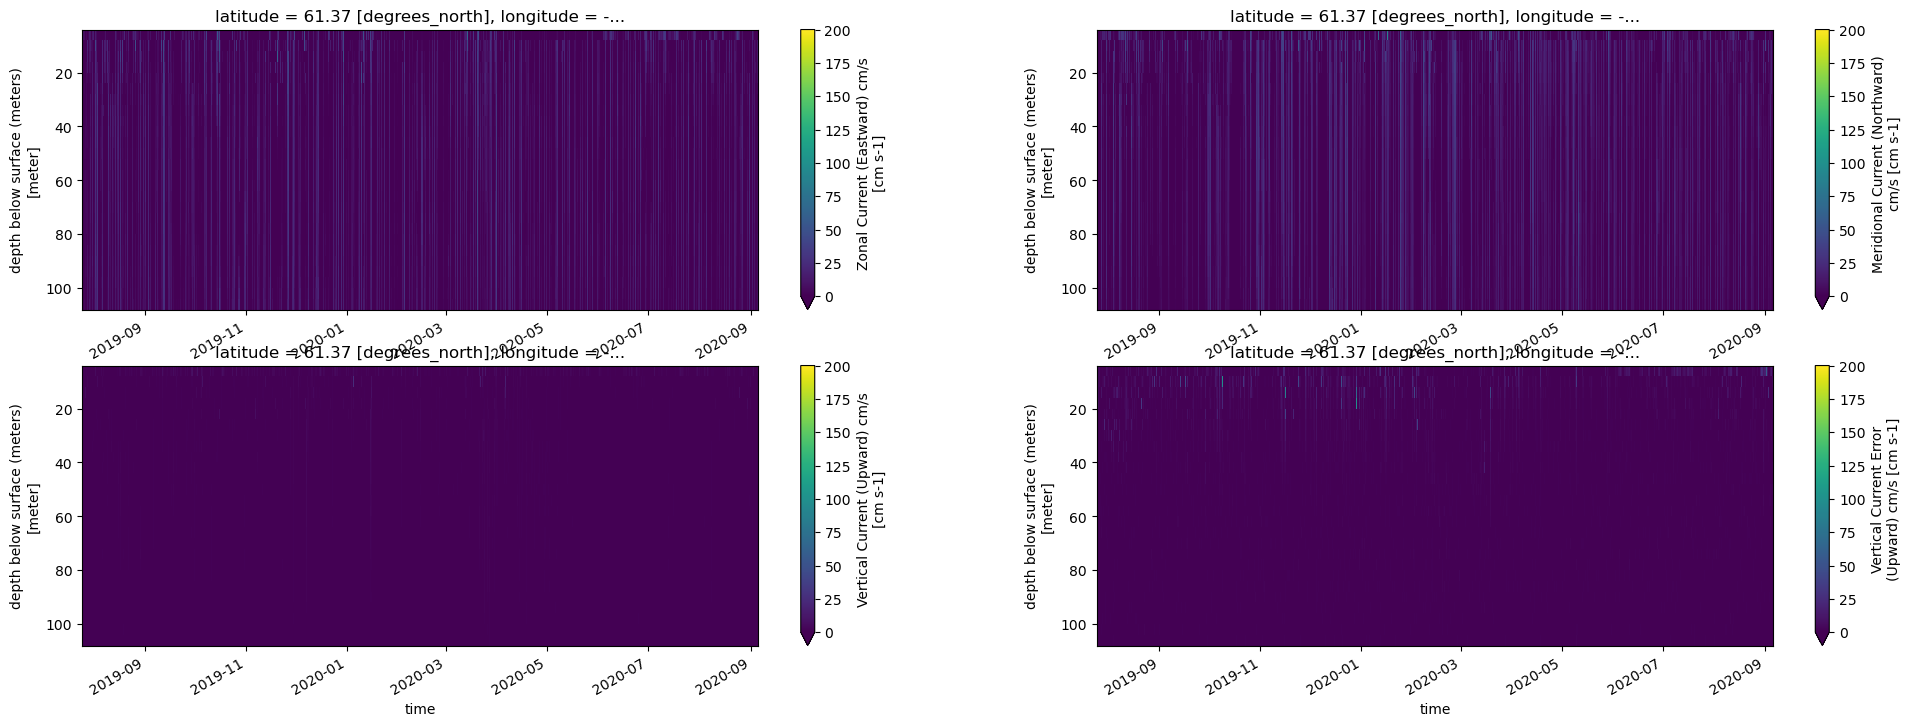

In [52]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [53]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >250cm/s'
except:
    xdf.attrs['history'] = 'removed U,V >250cm/s'
    

## Trim above surface (negative values)

In [54]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [55]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [56]:
ixdf.to_netcdf('19bsp11a_velein_0116m.trimmed.nc')

In [57]:
xdf = xa.load_dataset('19bsp11a_velein_0116m.trimmed.nc')

In [58]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [59]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Trim bad bins at top

In [60]:
# ixdf = ixdf.where(ixdf.depth >=-0.).dropna(how='all',dim='depth')

# nbins = 2
# ixdf = ixdf.isel(depth=slice(nbins,-1))

# ixdf.attrs['history'] = ixdf.attrs['history']+f'  trimmed top {nbins} of air contaminated data'

# ixdf.to_netcdf('19bsp11a_velein_0116m.trimmed.nc')

## Interpolate over singleton missing gaps linearly

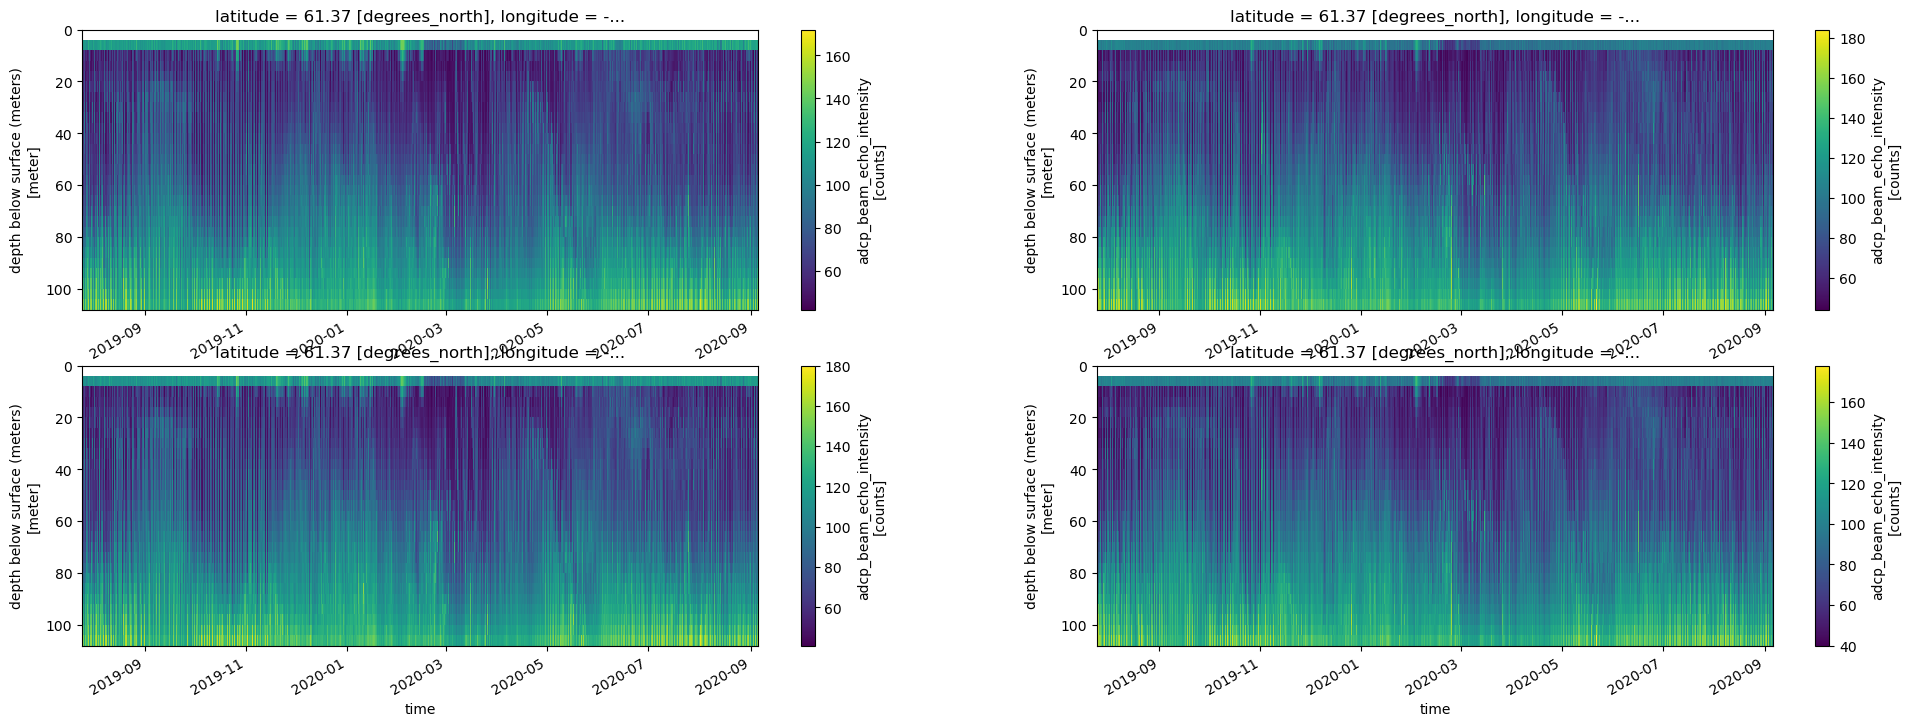

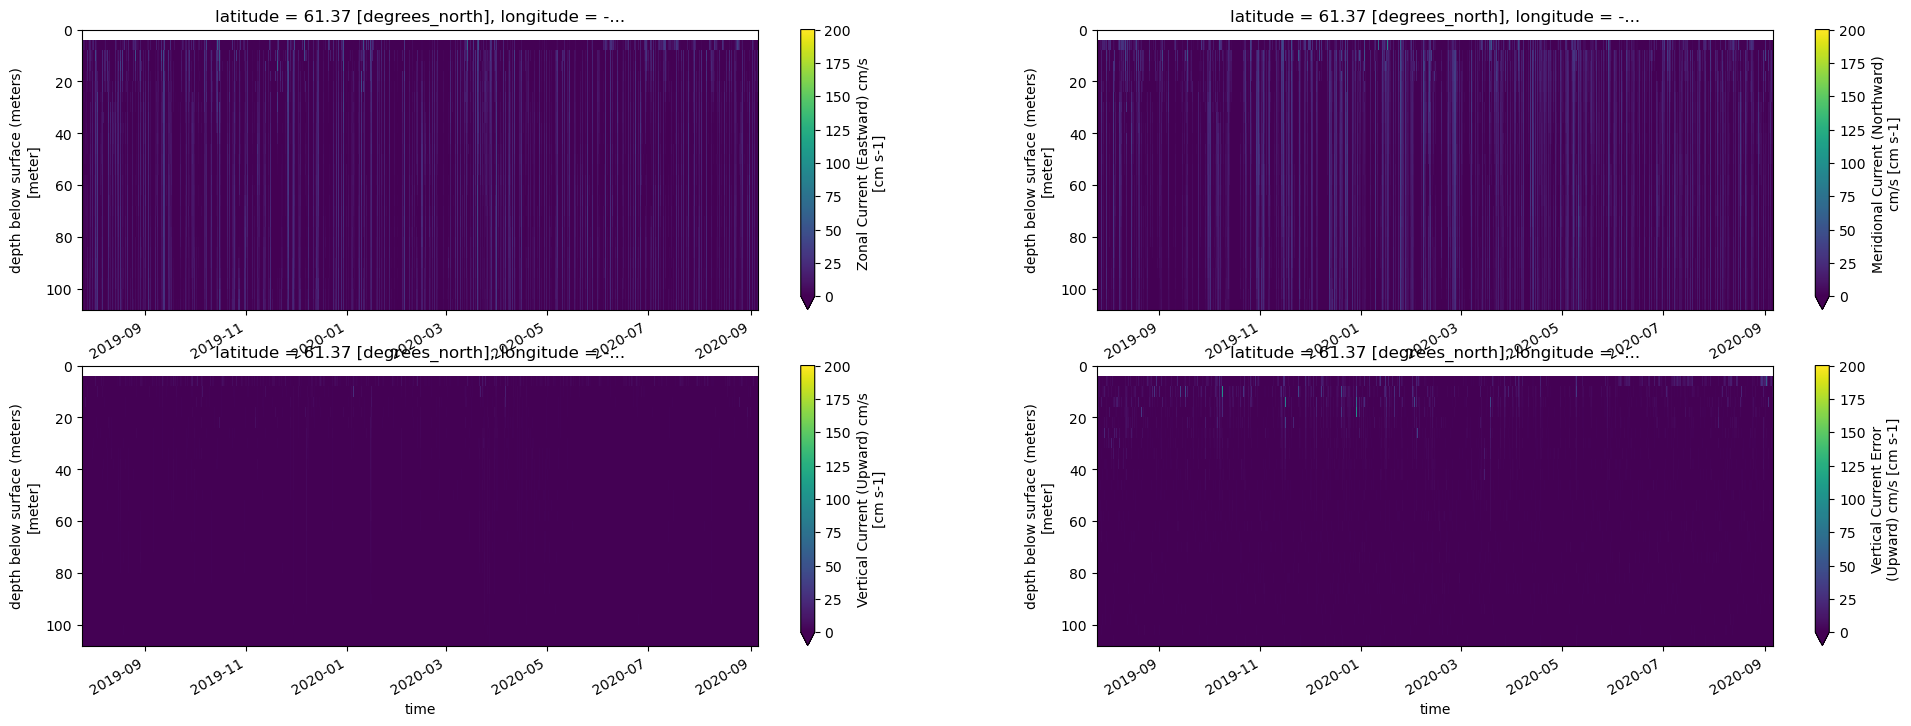

In [61]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
    axes[0,0].set_ylim(top=0)
    axes[0,1].set_ylim(top=0)
    axes[1,0].set_ylim(top=0)
    axes[1,1].set_ylim(top=0)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
    axes[0,0].set_ylim(top=0)
    axes[0,1].set_ylim(top=0)
    axes[1,0].set_ylim(top=0)
    axes[1,1].set_ylim(top=0)
except:
    pass

In [62]:
ixdf.to_netcdf('19bsp11a_velein_0116m.filtered.nc')

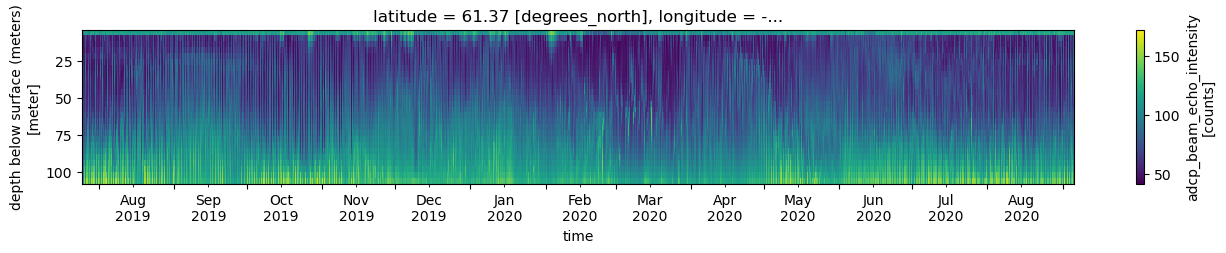

In [63]:
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,2))
ixdf['agc1'].T.plot(ax=ax, yincrease=False)

# xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

## Plot each depth

In [64]:
import EcoFOCIpy.plots.TimeSeriesStickPlot as TimeseriesStickPlot
import EcoFOCIpy.math.lanzcos as lanzcos 

import pandas as pd

In [65]:
ixdf = ixdf.dropna(dim='time')

In [66]:
dataset_id = '19bsp11a_'

In [67]:
plotfigs = False
verbose = False
savedata = False
domath = False

for dd in range(ixdf.depth.size-1,-1,-1):
    udata, vdata = None,None
    depth_curr = ixdf.isel(depth=dd)
    # depth_curr = depth_curr.sel(time=slice('2019-07','2019-10-1')) ###<<<<<<<<<<<<<<--------------- CHANGEME!!!!
    if verbose:
        print(f'depth: {depth_curr}, {dd}')
    ### filter
    try:
        udata = depth_curr.u_curr_comp[0,0,:].to_pandas()
        vdata = depth_curr.v_curr_comp[0,0,:].to_pandas()
    except:
        udata = depth_curr.ucomp_current[:,0,0].to_pandas()
        vdata = depth_curr.vcomp_current[:,0,0].to_pandas()
        
    data = pd.concat([udata, vdata], axis=1)
    data.columns = ['udata','vdata']

#     data['udata'][data.udata > 1e34]=np.nan
#     data['vdata'][data.vdata > 1e34]=np.nan
#     data = data.resample('1H').mean()

#     ## missing data fill limited by number of hours to linearly interpolate
#     data['tempu'] = data['udata'].interpolate(method='time',limit=6)
#     data['tempv'] = data['vdata'].interpolate(method='time',limit=6)

#     # get index of missing data that wasn't filled
#     # the remaining missing data will continue to be missing after analysis
#     # this data and the edges of the timeseries need to have the effects of the filter window accounted for

#     missing_index_u = np.isnan(data.tempu)
#     missing_index_v = np.isnan(data.tempv)
#     data['tempu'] = data['udata'].interpolate(method='time')
#     data['tempv'] = data['vdata'].interpolate(method='time')

#     #filter data with rudimentary matlab script
#     data['ufdata'] = lanzcos.lanzcos(data.tempu.values,1,35)+data['udata'].mean()
#     data['vfdata'] = lanzcos.lanzcos(data.tempv.values,1,35)+data['vdata'].mean()
#     data['ufdata'][missing_index_u] = np.nan
#     data['vfdata'][missing_index_v] = np.nan    

    #extra calculations
    if domath:
        print(dataset_id)
        print(data.describe()[['ufdata','vfdata']])

    #plot
    if plotfigs:
        try:
            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=data.index, 
                                 udata=data.udata.values, 
                                 vdata=data.vdata.values,
                                 rotate=0)
            # plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35')
            plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2))
            # fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35'+'.png',dpi=600)
            fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'.png',dpi=600)

            if verbose:
                #subsample
                datasub=data.resample('D').median()
                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=datasub.index, 
                                     udata=datasub.ufdata.values, 
                                     vdata=datasub.vfdata.values,
                                     linescale=10,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35_daily')
                fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35_daily'+'.png',dpi=600)

                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=data.index, 
                                     udata=data.udata.values, 
                                     vdata=data.vdata.values,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_nofilter')
                fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_nofilter'+'.png',dpi=600)
        except:
            pass
    #save data
    if savedata:
        data[['ufdata','vfdata']].to_csv(dataset_id+'_'+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35'+'.csv')

## Remove data from nn-bins if upper bins appear bad for currents

Remove top two bins to get to first good bin

In [68]:
trim_to_good = True

if trim_to_good:
    ixdf = ixdf.where(ixdf.depth >=-0.).dropna(how='all',dim='depth')

    nbins = 1
    ixdf = ixdf.isel(depth=slice(nbins,-1))

    ixdf.attrs['history'] = ixdf.attrs['history']+f'  trimmed top {nbins} of air contaminated data'

    ixdf.to_netcdf('19bsp11a_velein_0116m.trimmed.good.nc')

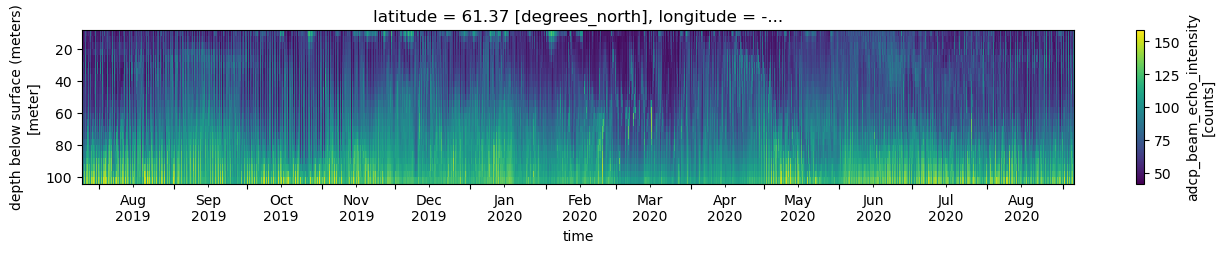

In [69]:
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,2))
ixdf['agc1'].T.plot(ax=ax, yincrease=False)

# xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)